# Análisis exploratorio hurto a personas en Cali
### Paso 1: importar librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale


- Configuración del sitio

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

### Paso 2: Cargar el dataset limpio

In [27]:
df = pd.read_csv('../data/HURTO_PERSONAS_CALI.csv')

- Asegurarse que FECHA HECHO sea datetime

In [28]:
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y', errors='coerce')

### Paso 3: Verificar datos generales

In [29]:
print("Rango de fechas: ", df['FECHA HECHO'].min(), " - ", df['FECHA HECHO'].max())
print("Total de registros: ", len(df))

Rango de fechas:  2003-01-02 00:00:00  -  2025-03-31 00:00:00
Total de registros:  7582


### Paso 4: Hurto por año

/tmp/ipykernel_47876/2195663488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hurto_por_year, x='AÑO', y='CANTIDAD', palette='Blues_r')


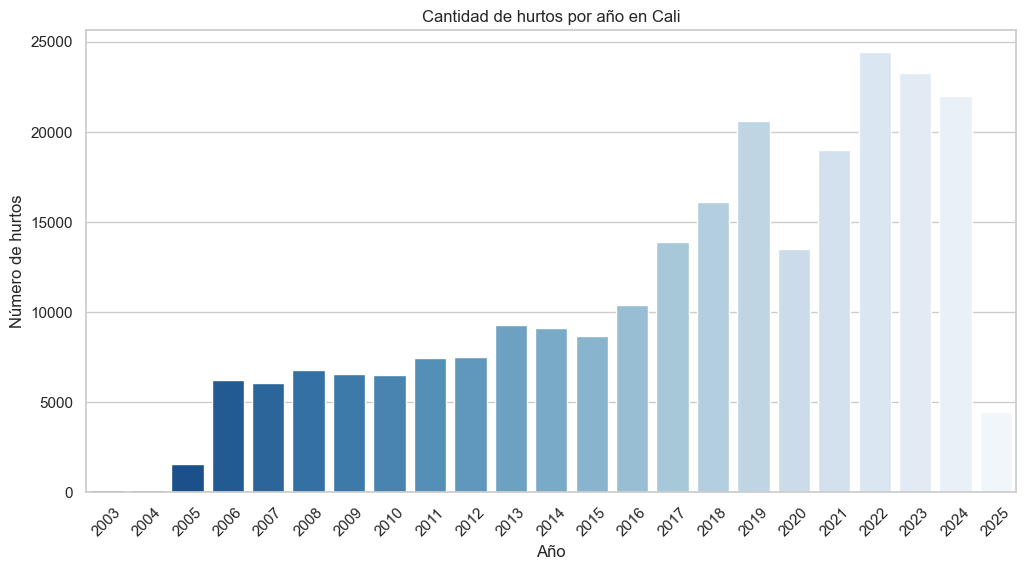

In [30]:
hurto_por_year = df.groupby('AÑO')['CANTIDAD'].sum().reset_index()
sns.barplot(data=hurto_por_year, x='AÑO', y='CANTIDAD', palette='Blues_r')
plt.title('Cantidad de hurtos por año en Cali')
plt.ylabel('Número de hurtos')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.show()


### Paso 5: Hurto por día de la semana

In [31]:
# Asegurar tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Establecer idioma español para días de la semana
try:
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')  # Linux/macOS
except:
    locale.setlocale(locale.LC_TIME, '')  # Windows fallback

# Crear columna con nombre del día de la semana en español
df['DIA_SEMANA'] = df['FECHA'].dt.day_name().str.upper()

# Confirmar resultado
print(df[['FECHA', 'DIA_SEMANA']].head())


       FECHA DIA_SEMANA
0 2003-01-02   THURSDAY
1 2003-01-04   SATURDAY
2 2003-01-15  WEDNESDAY
3 2003-01-18   SATURDAY
4 2003-01-29  WEDNESDAY


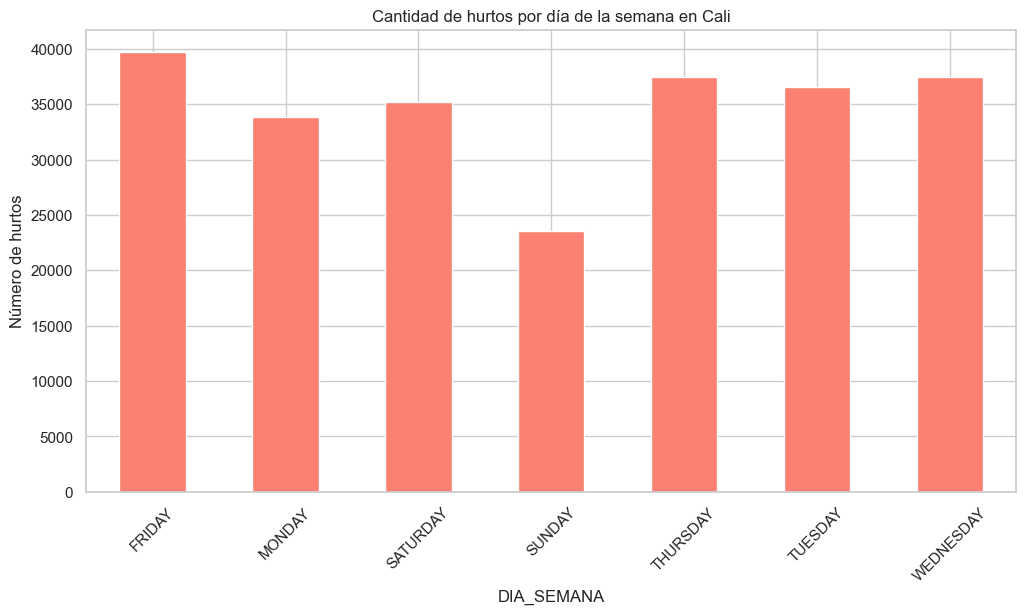

In [32]:
hurto_por_dia = df.groupby('DIA_SEMANA')['CANTIDAD'].sum().reindex()

hurto_por_dia.plot(kind='bar', color='salmon')
plt.title('Cantidad de hurtos por día de la semana en Cali')
plt.ylabel('Número de hurtos')
plt.xticks(rotation=45)
plt.show()



### Paso 6: Hurto por mes (agregado en todos los años)

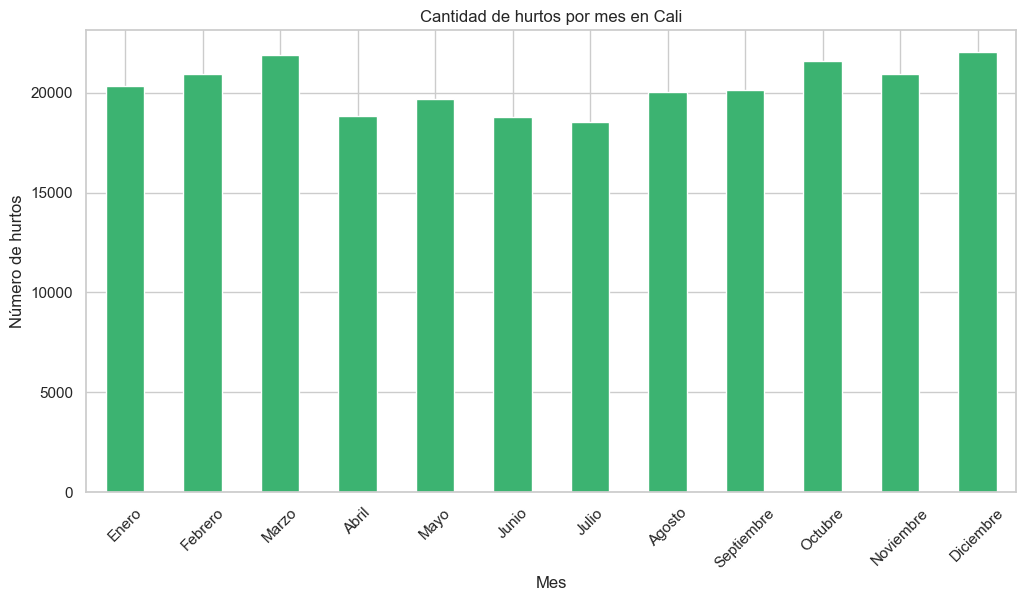

In [33]:
hurto_por_mes = df.groupby('MES')['CANTIDAD'].sum()
hurto_por_mes.index = hurto_por_mes.index.map({
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
})

hurto_por_mes.plot(kind='bar', color='mediumseagreen')
plt.title('Cantidad de hurtos por mes en Cali')
plt.ylabel('Número de hurtos')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.show()


